In [1]:
%load_ext autoreload
%autoreload 2

## Physics Informed Neural Networks for Inverse Problems

In [2]:
from pinn import PINNTrainer
import matplotlib.pyplot as plt
import torch.optim as optim
import numpy as np

## Set up

In [3]:
kwargs = {
    "alpha_f" :0.05 ,
    "h_f" : 5,
    "T_hot" : 4,
    "u_f" : 1,
    "T0" : 1,
    "T_cold" : 1,
}

n_int = 128
n_sb = 64
n_tb = 64

pinn = PINNTrainer(n_int, n_sb, n_tb, **kwargs)

In [4]:
# Plot the input training points

input_sb_, output_sb_ = pinn.add_spatial_boundary_points()
input_tb_, output_tb_ = pinn.add_temporal_boundary_points()
input_int_, output_int_ = pinn.add_interior_points()
input_meas_, output_meas_ = pinn.get_measurement_data()

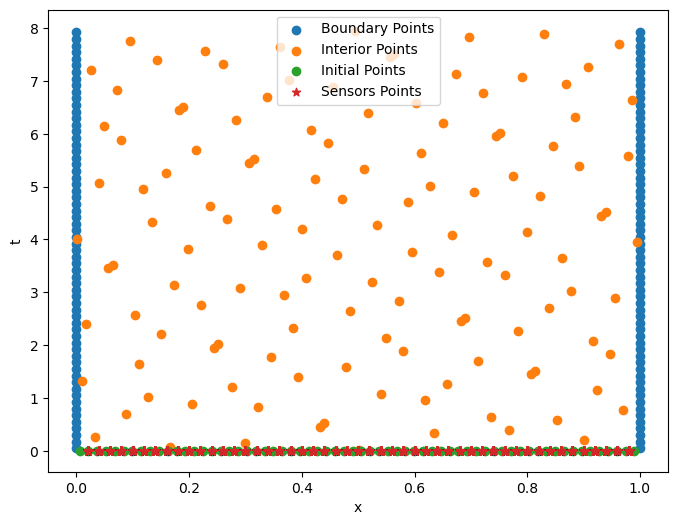

In [5]:
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(input_sb_[:, 1].detach().numpy(), input_sb_[:, 0].detach().numpy(), label="Boundary Points")
plt.scatter(input_int_[:, 1].detach().numpy(), input_int_[:, 0].detach().numpy(), label="Interior Points")
plt.scatter(input_tb_[:, 1].detach().numpy(), input_tb_[:, 0].detach().numpy(), label="Initial Points")
plt.scatter(input_meas_[:, 1].detach().numpy(), input_meas_[:, 0].detach().numpy()*0, label="Sensors Points", marker="*")

plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Measured Tf')

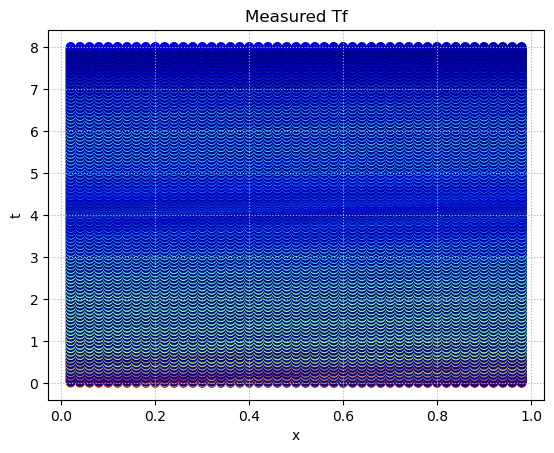

In [14]:
plt.scatter(
    input_meas_[:, 1].detach(),
    input_meas_[:, 0].detach(),
    c=output_meas_.detach(),
    cmap="jet",
    clim=(1, 4)
)
plt.xlabel("x")
plt.ylabel("t")
plt.grid(True, which="both", ls=":")
plt.title(f"Measured Tf")

## Training

In [6]:
hist = pinn.fit(num_epochs=1, verbose=True)

################################  0  ################################
Total loss:  1.945 | PDE Loss:  0.9353 | Function Loss:  0.2852
Total loss:  1.9305 | PDE Loss:  0.9239 | Function Loss:  0.1103
Total loss:  1.8292 | PDE Loss:  0.8179 | Function Loss:  0.238
Total loss:  1.7585 | PDE Loss:  0.6976 | Function Loss:  0.8755
Total loss:  1.684 | PDE Loss:  0.5743 | Function Loss:  1.0326
Total loss:  1.5179 | PDE Loss:  0.3674 | Function Loss:  0.9848
Total loss:  1.3999 | PDE Loss:  0.356 | Function Loss:  0.3834
Total loss:  1.344 | PDE Loss:  0.3352 | Function Loss:  -0.3525
Total loss:  1.3328 | PDE Loss:  0.3261 | Function Loss:  -0.4829
Total loss:  1.3221 | PDE Loss:  0.3174 | Function Loss:  -0.6514
Total loss:  1.3089 | PDE Loss:  0.3059 | Function Loss:  -0.8568
Total loss:  1.3003 | PDE Loss:  0.2976 | Function Loss:  -0.9115
Total loss:  1.2916 | PDE Loss:  0.2886 | Function Loss:  -0.8778
Total loss:  1.2811 | PDE Loss:  0.2765 | Function Loss:  -0.7004
Total loss:  1.276

## Visualization

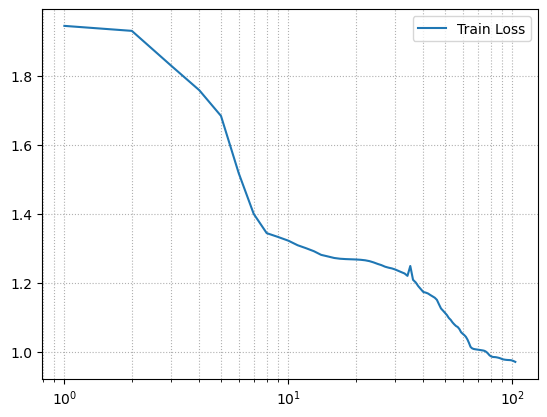

In [7]:
plt.figure(dpi=100)
plt.grid(True, which="both", ls=":")
plt.plot(np.arange(1, len(hist) + 1), hist, label="Train Loss")
plt.xscale("log")
plt.legend()

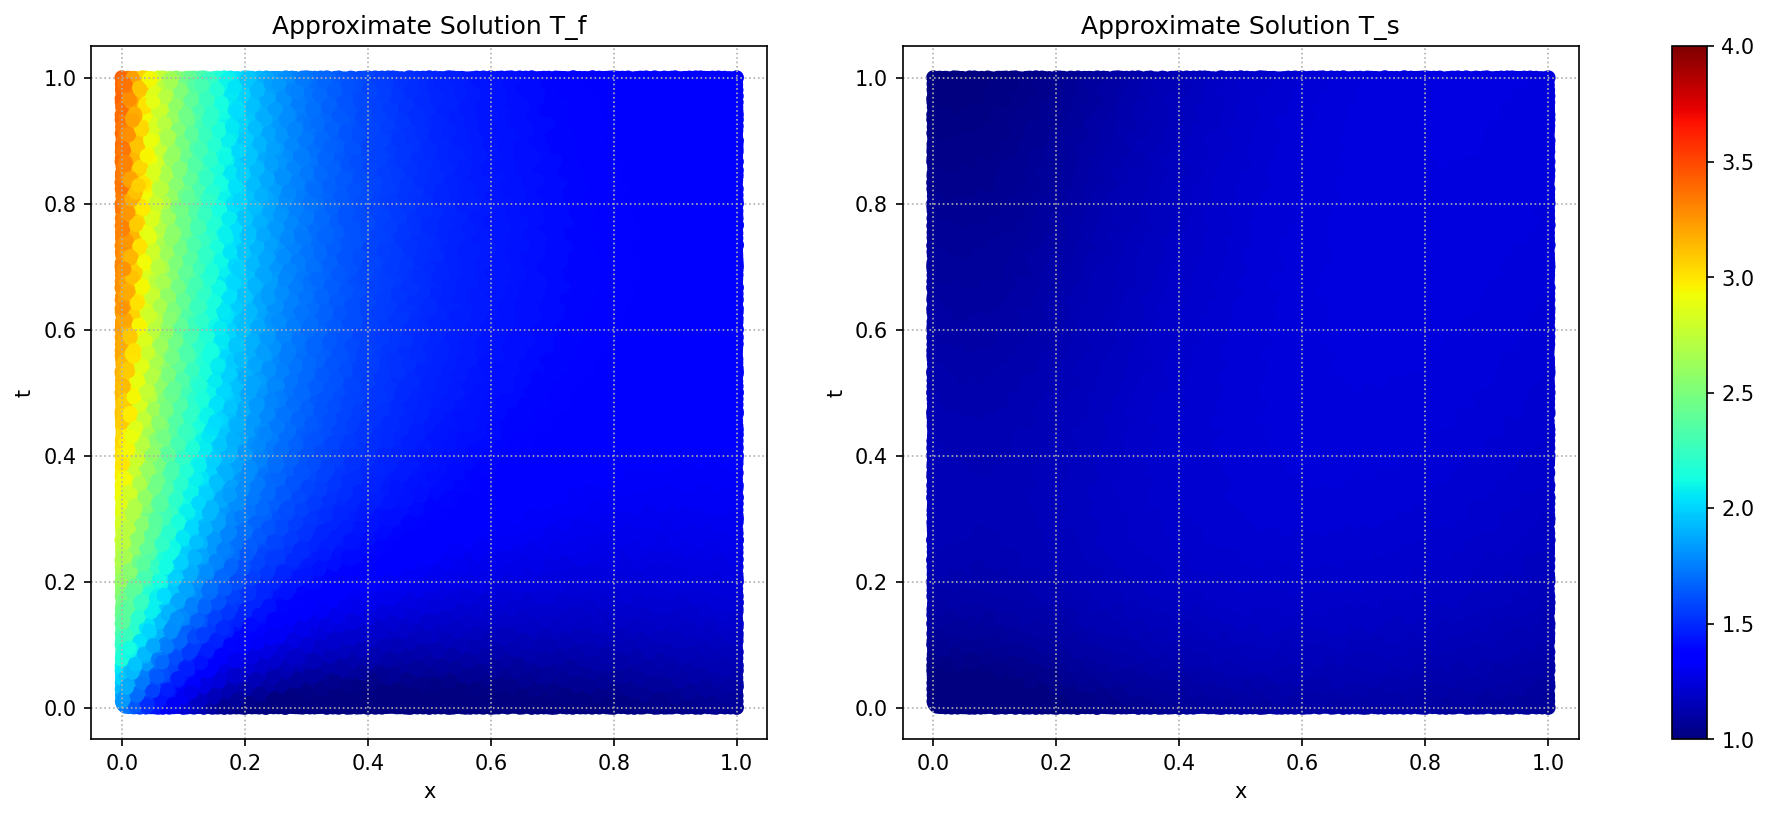

In [8]:
pinn.plot()